In [1]:
# to deal with matracies
import numpy as np
# to read data
import pandas as pd 
# to display data
from matplotlib import pyplot as plt 

In [2]:
# importing MNIST Dataset from Kaggle
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

# Dimensions of data
m, n = data.shape

# Shuffle to prevent the model from learning patterns based on data order
np.random.shuffle(data)

# First thousand examples
# .T makes data as a column instead of row
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# First thousand to train
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([2, 5, 0, ..., 6, 5, 9])

This section loads all examples

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train,Y_train, 0.10, 500)

Iteration:  0
[8 2 8 ... 2 0 2] [2 5 0 ... 6 5 9]
0.08151219512195122
Iteration:  10
[2 1 6 ... 2 0 2] [2 5 0 ... 6 5 9]
0.20490243902439023
Iteration:  20
[2 1 2 ... 2 5 2] [2 5 0 ... 6 5 9]
0.27995121951219515
Iteration:  30
[2 1 2 ... 4 5 7] [2 5 0 ... 6 5 9]
0.34063414634146344
Iteration:  40
[2 2 2 ... 4 5 7] [2 5 0 ... 6 5 9]
0.39158536585365855
Iteration:  50
[3 2 2 ... 4 5 7] [2 5 0 ... 6 5 9]
0.43734146341463415
Iteration:  60
[3 2 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.47804878048780486
Iteration:  70
[3 2 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.5169024390243903
Iteration:  80
[3 2 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.5476829268292683
Iteration:  90
[3 0 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.5738292682926829
Iteration:  100
[3 8 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.5955609756097561
Iteration:  110
[3 8 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.6159756097560976
Iteration:  120
[3 5 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.6339268292682927
Iteration:  130
[3 5 0 ... 4 5 7] [2 5 0 ... 6 5 9]
0.650219512195122
Iteration: 

85% Accuracy

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


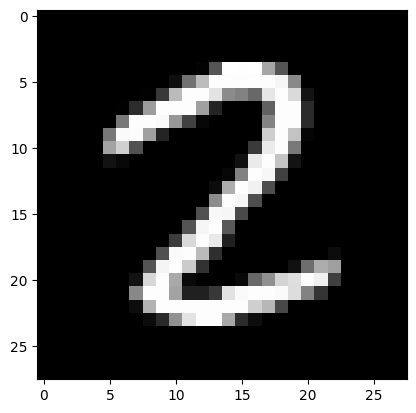

Prediction:  [9]
Label:  5


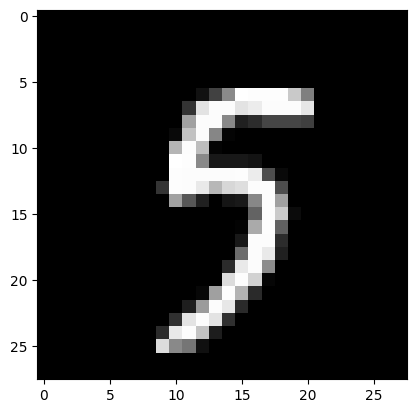

Prediction:  [0]
Label:  0


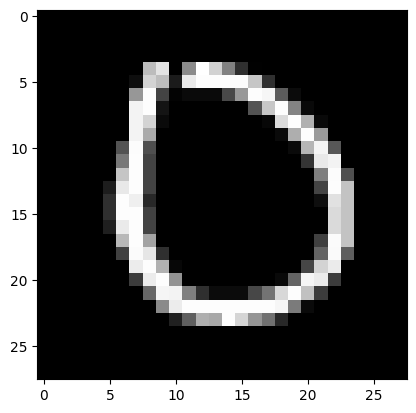

Prediction:  [8]
Label:  8


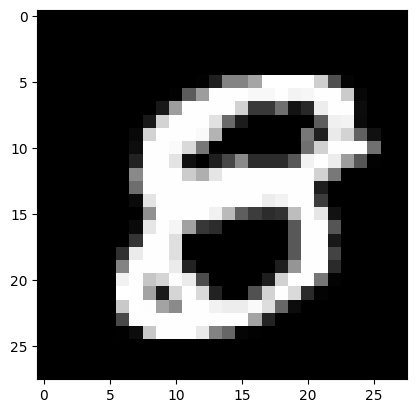

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 9 6 8 2 3 4 3 7 9 1 4 8 7 8 5 0 1 3 9 5 0 1 7 9 6 8 7 3 5 3 7 0 6 4 5 8
 7 3 9 7 9 2 0 8 4 2 8 5 8 4 0 7 6 8 1 6 6 3 8 8 0 6 4 0 2 1 5 4 7 4 1 7 3
 8 9 2 7 2 4 3 4 7 3 2 0 8 7 1 1 3 6 0 9 6 2 3 8 8 5 1 6 8 1 0 6 3 6 1 2 4
 3 3 2 9 2 0 7 7 8 7 9 1 1 2 6 3 1 5 1 1 9 0 5 5 7 4 2 6 4 4 4 4 5 3 5 3 9
 7 3 8 8 6 0 5 5 5 4 1 0 1 6 1 7 7 4 9 2 5 1 8 6 1 7 0 0 9 7 2 5 2 9 0 2 5
 9 0 9 1 8 4 4 2 5 3 7 2 8 4 5 8 8 8 4 2 0 4 5 3 9 6 2 9 0 0 9 5 8 0 1 3 3
 1 4 0 2 3 0 5 6 5 6 9 2 5 7 9 4 3 3 0 9 1 7 6 3 7 1 2 5 5 0 9 7 7 8 3 9 8
 3 3 0 0 8 1 3 3 7 7 8 8 5 8 9 7 5 8 5 8 1 6 2 0 0 8 9 4 8 4 8 1 1 7 0 0 0
 0 4 3 9 5 0 7 6 7 6 1 9 8 3 8 4 8 2 9 0 6 8 6 6 5 2 4 7 4 1 2 2 3 6 3 7 2
 2 1 9 2 2 4 1 4 0 2 2 3 8 3 6 6 3 8 0 8 9 0 5 2 9 3 3 2 1 5 8 3 6 7 7 2 7
 8 2 7 1 7 3 0 6 0 5 9 4 2 7 0 2 3 1 1 3 9 3 2 6 5 4 0 7 4 6 0 0 8 1 5 9 8
 3 6 0 2 2 8 1 3 5 2 3 6 7 7 1 8 6 6 6 4 7 6 3 7 4 8 6 4 6 4 8 0 1 8 1 9 7
 5 0 3 2 2 8 0 8 8 6 0 4 5 2 3 4 1 1 7 0 0 3 2 2 8 0 7 8 5 9 0 2 7 4 1 0 1
 9 0 9 0 2 2 8 7 3 5 2 6 

0.832